In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
articles = pd.read_csv('/content/drive/MyDrive/articles.csv')
customers = pd.read_csv('/content/drive/MyDrive/customers.csv')
tr = pd.read_csv('/content/drive/MyDrive/transactions_train.csv', chunksize=1000000)
transactions_df = next(tr)

In [4]:
merged_df = transactions_df.merge(articles, on="article_id", how="left")
merged_df = merged_df.merge(customers, on="customer_id", how="left")
print(merged_df.columns)
print(merged_df)

# identifying major categories
print(merged_df["product_group_name"].value_counts())
top_categories = merged_df["product_group_name"].value_counts().index[:9]


merged_df = merged_df[merged_df["product_group_name"].isin(top_categories)]

# Label encoding major categories
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
merged_df["target"] = label_encoder.fit_transform(merged_df["product_group_name"])

category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(category_mapping)
print(merged_df.dtypes)

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'product_code', 'prod_name', 'product_type_no', 'product_type_name',
       'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc', 'FN', 'Active',
       'club_member_status', 'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')
             t_dat                                        customer_id  \
0       2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
1       2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2       2018-09-20  00007d2de826758

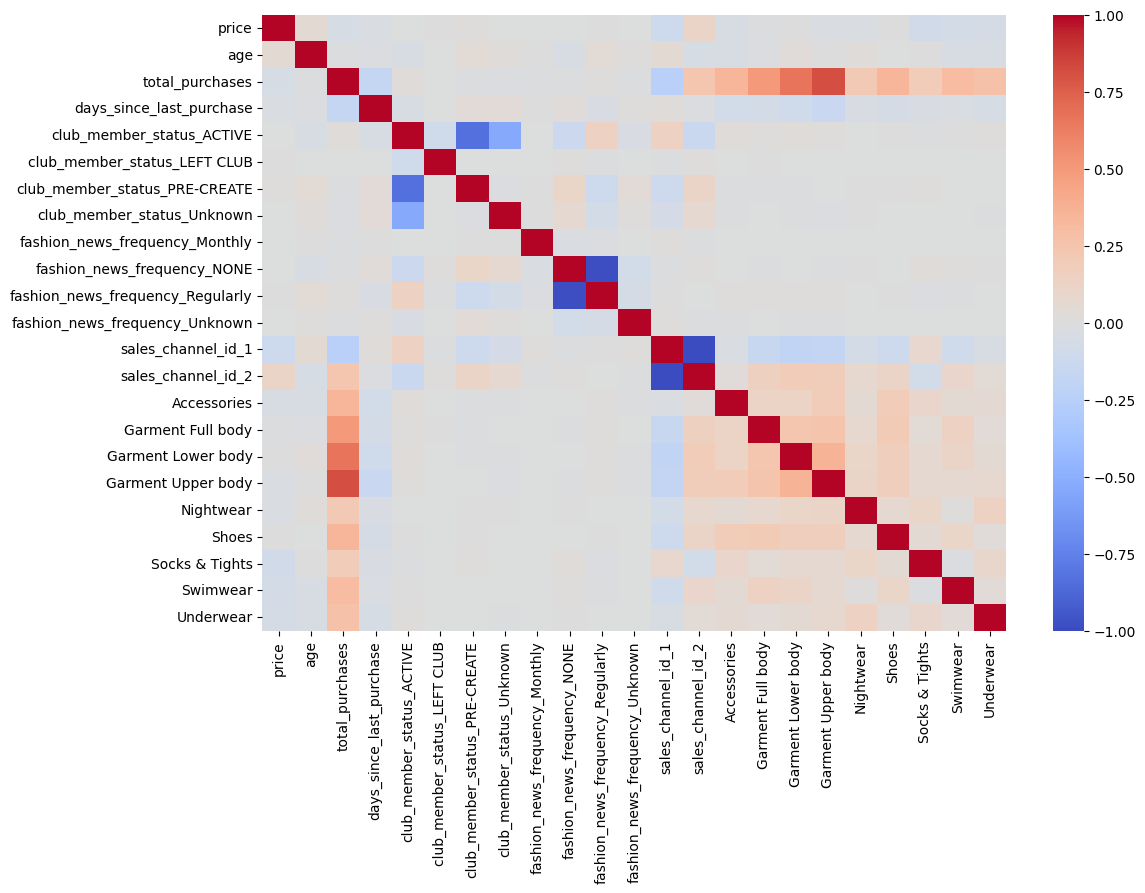

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = pd.DataFrame(X_scaled, columns=selected_features_bayes).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

merged_df = transactions_df.merge(articles, on="article_id", how="left")
merged_df = merged_df.merge(customers, on="customer_id", how="left")

top_categories = merged_df["product_group_name"].value_counts().index[:9]
merged_df = merged_df[merged_df["product_group_name"].isin(top_categories)].copy()

# label encoding the target variable
label_encoder = LabelEncoder()
merged_df.loc[:, "target"] = label_encoder.fit_transform(merged_df["product_group_name"])

categorical_cols = ["club_member_status", "fashion_news_frequency", "sales_channel_id"]
merged_df[categorical_cols] = merged_df[categorical_cols].fillna("Unknown")

# one hot encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_features = encoder.fit_transform(merged_df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

merged_df = pd.concat([merged_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

customer_total_purchases = merged_df.groupby("customer_id")["article_id"].count().reset_index()
customer_total_purchases.rename(columns={"article_id": "total_purchases"}, inplace=True)
merged_df = merged_df.merge(customer_total_purchases, on="customer_id", how="left")

customer_category_counts = merged_df.groupby(["customer_id", "product_group_name"])["article_id"].count().reset_index()
customer_category_counts.rename(columns={"article_id": "purchase_count"}, inplace=True)
customer_purchase_history = customer_category_counts.pivot(index="customer_id", columns="product_group_name", values="purchase_count").fillna(0)
merged_df = merged_df.merge(customer_purchase_history, on="customer_id", how="left")

merged_df["age"].fillna(merged_df["age"].median(), inplace=True)
merged_df["price"].fillna(merged_df["price"].median(), inplace=True)
merged_df["total_purchases"].fillna(0, inplace=True)

selected_features_bayes = ["price", "age", "total_purchases"]  # Removed `days_since_last_purchase`
selected_features_bayes += encoded_df.columns.tolist()
selected_features_bayes += customer_purchase_history.columns.tolist()

X = merged_df[selected_features_bayes]
y = merged_df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Feature Engineering & Data Preparation Complete!")

print("Features used in the model:")
print(selected_features_bayes)


<ipython-input-9-3cc253ce8880>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["age"].fillna(merged_df["age"].median(), inplace=True)
<ipython-input-9-3cc253ce8880>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Feature Engineering & Data Preparation Complete!
Features used in the model:
['price', 'age', 'total_purchases', 'club_member_status_ACTIVE', 'club_member_status_LEFT CLUB', 'club_member_status_PRE-CREATE', 'club_member_status_Unknown', 'fashion_news_frequency_Monthly', 'fashion_news_frequency_NONE', 'fashion_news_frequency_Regularly', 'fashion_news_frequency_Unknown', 'sales_channel_id_1', 'sales_channel_id_2', 'Accessories', 'Garment Full body', 'Garment Lower body', 'Garment Upper body', 'Nightwear', 'Shoes', 'Socks & Tights', 'Swimwear', 'Underwear']


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report

# using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nb_model = CategoricalNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)
print(y_pred)

y_pred_labels = label_encoder.inverse_transform(y_pred)
print(y_pred_labels)

# evaluating model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))

[3 3 3 ... 3 3 3]
['Garment Upper body' 'Garment Upper body' 'Garment Upper body' ...
 'Garment Upper body' 'Garment Upper body' 'Garment Upper body']
Accuracy: 0.5001
              precision    recall  f1-score   support

           0       0.33      0.00      0.00     10611
           1       0.40      0.00      0.00     12299
           2       1.00      0.00      0.00     46257
           3       0.50      1.00      0.67     99860
           4       0.00      0.00      0.00      2228
           5       0.38      0.00      0.00      4999
           6       0.00      0.00      0.00      6202
           7       1.00      0.00      0.01      4544
           8       0.73      0.00      0.00     12793

    accuracy                           0.50    199793
   macro avg       0.48      0.11      0.08    199793
weighted avg       0.60      0.50      0.33    199793



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
